In [1]:
#Importando a biblioteca Numpy
import   numpy   as   np
#Importando a biblioteca matplolib
import   matplotlib.pyplot   as   plt
#importando uma biblioteca pil (Python Imaging Library)
from PIL   import   Image 

ModuleNotFoundError: No module named 'matplotlib'

In [156]:
# lendo a imagem 
imagem = Image.open("imagem4.png")

In [227]:
#abrindo a imagem
imagem = Image.open("imagem4.png")
#convertendo a imagem para RGB
imagem = imagem.convert("RGB")
#transformando a imagem em um matriz
imagem = np.asarray(imagem)


In [228]:
# inverter a ordem dos elementos 
matriz_espelhada = np.flip(imagem, axis=1)


In [229]:
imagem.shape

(667, 900, 3)

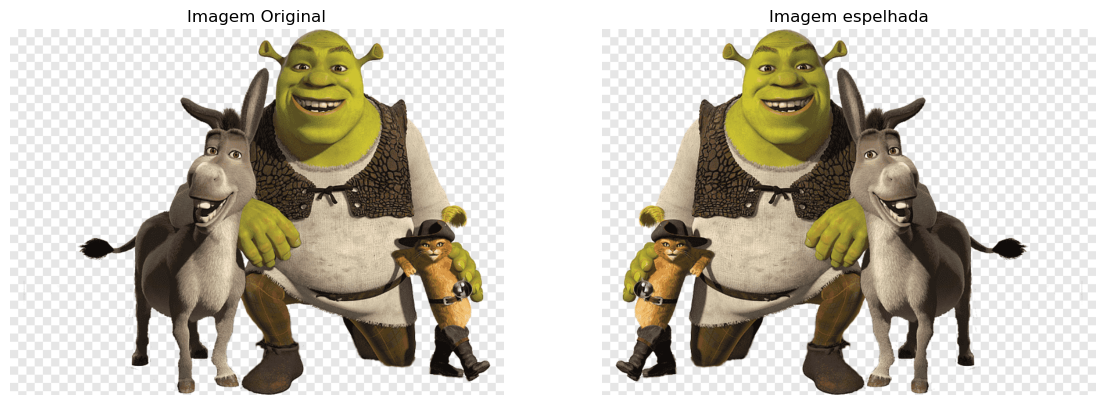

In [230]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(imagem)
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(matriz_espelhada)
plt.title('Imagem espelhada')
plt.axis('off')

plt.show()

In [94]:
mtr = np.transpose(imagem[:,:,0])
mtg = np.transpose(imagem[:,:,1])
mtb = np.transpose(imagem[:,:,2])

mt = np.zeros((1280,720,3))

mt[:,:,0],mt[:,:,1],mt[:,:,2]=mtr,mtg,mtb



<function matplotlib.pyplot.show(close=None, block=None)>

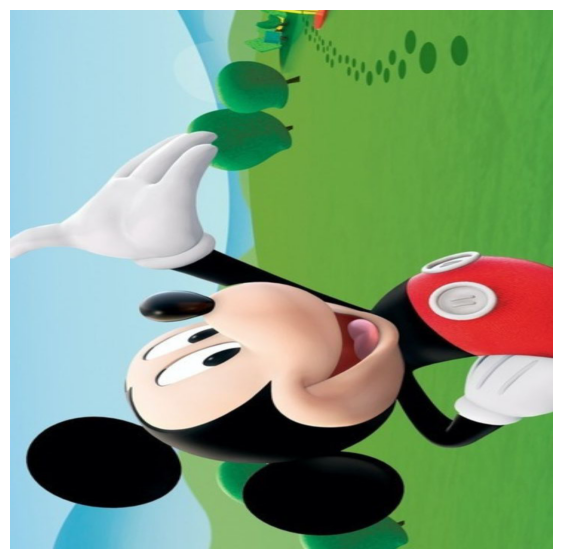

In [95]:
plt.figure(figsize=(7,7))
im = plt.imshow(mt, aspect='auto')
plt.axis('off')
plt.show


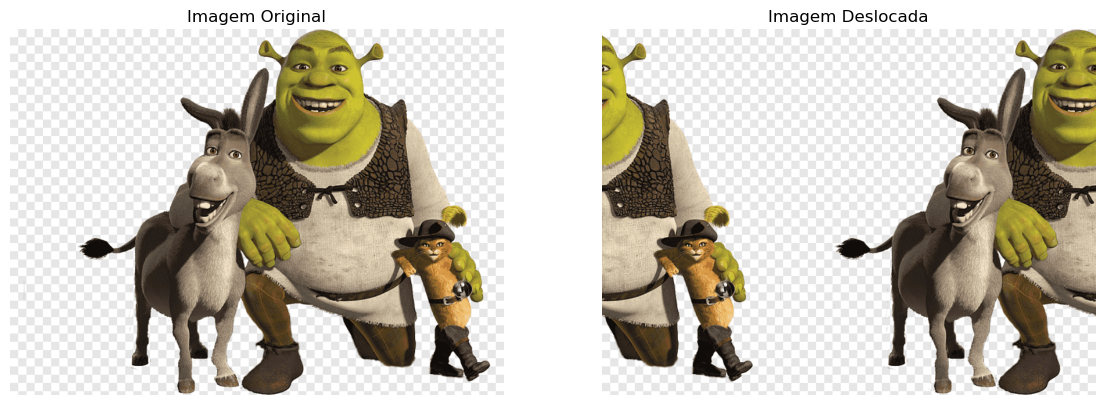

In [214]:

imagem = Image.open("imagem4.png")
imagem = imagem.convert("RGB")
imagem = np.asarray(imagem)


# Definindo o deslocamento temporal
deslocamento = 300  # Altere esse valor conforme necessário
# Realizando o deslocamento temporal
imagem_deslocada = np.roll(imagem, deslocamento, axis=1)
# Exibindo a imagem original e a imagem deslocada
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1) 
plt.imshow(imagem)
plt.title('Imagem Original')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(imagem_deslocada)
plt.title('Imagem Deslocada')
plt.axis('off')
plt.show()


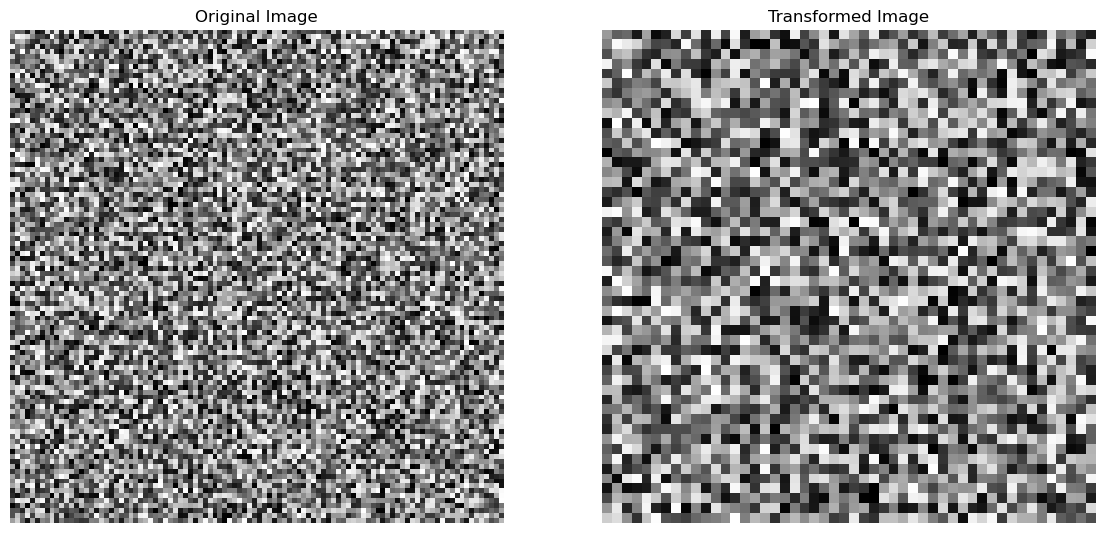

In [118]:
import numpy as np
import matplotlib.pyplot as plt

def geometric_transformation(image, transform_f):
    new_image = np.zeros((image.shape[0], image.shape[1]))
   
    for row in range(image.shape[0]):
        for column in range(image.shape[1]):   
            x, y = transform_f(row, column)
            
            try:
                if int(x) < 0 or int(y) < 0:
                    raise Exception
                new_image[row][column] = image[int(x)][int(y)]
            except:
                new_image[row][column] = 0
    return new_image

def scale_image(row, column, scale_factor=0.5):
    x = row * scale_factor
    y = column * scale_factor
    return x, y

# Creating a sample image
image = np.random.rand(100, 100)  # Random image for example

transformed_image = geometric_transformation(image, scale_image)

plt.figure(figsize=(14, 7))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')  # Assuming your image is grayscale
plt.title('Original Image')
plt.axis('off')
plt.show()
# Transformed Image
plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')  # Assuming your image is grayscale
plt.title('Transformed Image')
plt.axis('off')




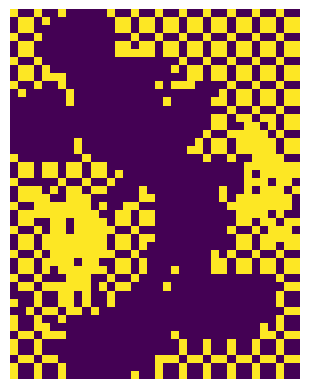

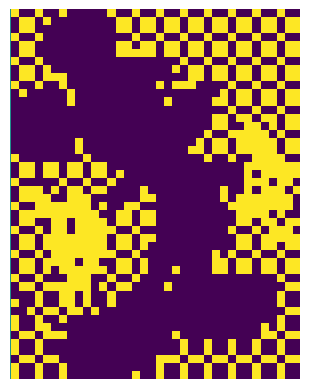

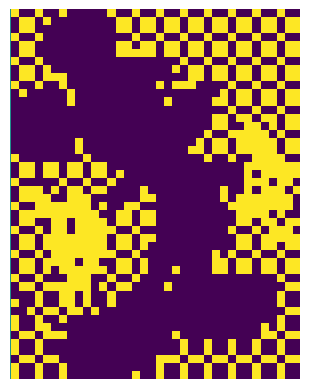

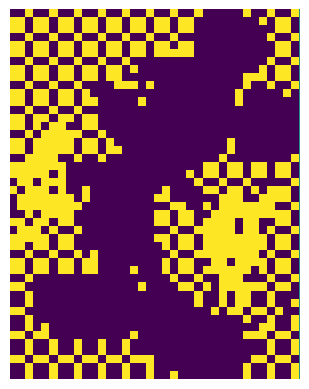

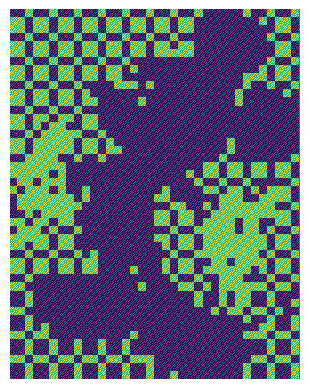

In [119]:
from PIL import Image
import matplotlib.pyplot as plt

# Passo 1: Escolha da Imagem
# Supondo que você já tenha uma imagem chamada "imagem.png" no mesmo diretório do script

# Passo 2: Transformação em Pixelart (requer uma biblioteca de manipulação de imagens, como PIL)
def transform_to_pixelart(image_path, pixel_size):
    image = Image.open(image_path)
    image = image.convert("RGB")
    image = image.resize((image.width // pixel_size, image.height // pixel_size), Image.NEAREST)
    pixelart = image.resize((image.width * pixel_size, image.height * pixel_size), Image.NEAREST)
    return pixelart

# Passo 3: Codificação de Cores
# Mapeamento de cores para números
color_codes = {
    (0, 0, 0): 0,    # Preto
    (255, 255, 255): 1,  # Branco
    (255, 255, 0): 2,    # Amarelo
    (255, 0, 0): 3,      # Vermelho
    (0, 0, 255): 4       # Azul
    # Adicione mais cores conforme necessário
}

# Passo 4: Implementação
def image_to_matrix(pixelart, color_codes):
    matrix = []
    for y in range(pixelart.height):
        row = []
        for x in range(pixelart.width):
            color = pixelart.getpixel((x, y))
            code = color_codes.get(color, -1)  # -1 para cores não mapeadas
            row.append(code)
        matrix.append(row)
    return matrix

# Função para exibir matriz como imagem
def plot_matrix(matrix):
    plt.imshow(matrix, cmap='viridis', interpolation='nearest')
    plt.axis('off')
    plt.show()

# Exemplo de uso:
imagem_pixelart = transform_to_pixelart("imagem.png", 10)
matriz_pixelart = image_to_matrix(imagem_pixelart, color_codes)
plot_matrix(matriz_pixelart)

# SEGUNDA PARTE

# Passo 1: Deslocamento Temporal
def deslocamento_temporal(matriz, direcao):
    if direcao == 'direita':
        for linha in matriz:
            linha.insert(0, 0)
            linha.pop()
    elif direcao == 'esquerda':
        for linha in matriz:
            linha.append(0)
            linha.pop(0)
    elif direcao == 'cima':
        matriz.pop(0)
        matriz.append([0] * len(matriz[0]))
    elif direcao == 'baixo':
        matriz.insert(0, [0] * len(matriz[0]))
        matriz.pop()

# Exemplo de uso:
deslocamento_temporal(matriz_pixelart, 'direita')
plot_matrix(matriz_pixelart)

# Passo 2: Escalonamento
def escalonamento(matriz, escala):
    nova_matriz = []
    for linha in matriz:
        nova_linha = []
        for elemento in linha:
            nova_linha.extend([elemento] * escala)
        nova_matriz.extend([nova_linha] * escala)
    return nova_matriz

# Exemplo de uso:
matriz_pixelart_escalada = escalonamento(matriz_pixelart, 2)
plot_matrix(matriz_pixelart_escalada)

# Passo 3: Reversão
def reversao(matriz, eixo):
    if eixo == 'horizontal':
        for linha in matriz:
            linha.reverse()
    elif eixo == 'vertical':
        matriz.reverse()

# Exemplo de uso:
reversao(matriz_pixelart, 'horizontal')
plot_matrix(matriz_pixelart)

# Passo 4: Sinal Periódico
def sinal_periodico(matriz, periodo):
    for y, linha in enumerate(matriz):
        for x, elemento in enumerate(linha):
            if (x + y) % periodo == 0:
                matriz[y][x] = (matriz[y][x] + 1) % len(color_codes)

# Exemplo de uso:
sinal_periodico(matriz_pixelart, 3)
plot_matrix(matriz_pixelart)


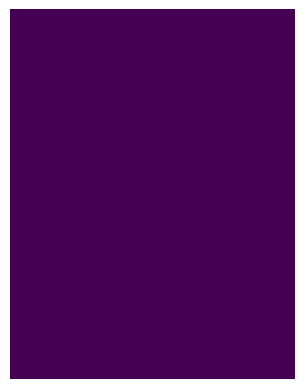

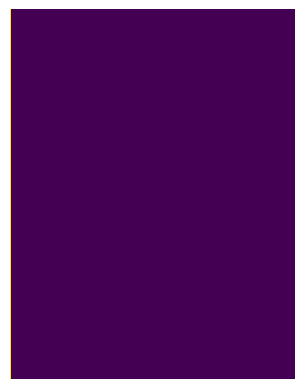

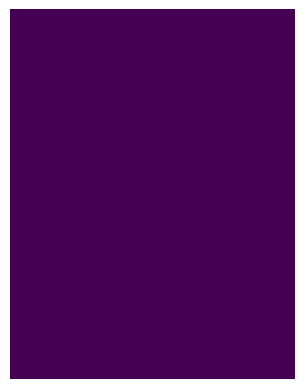

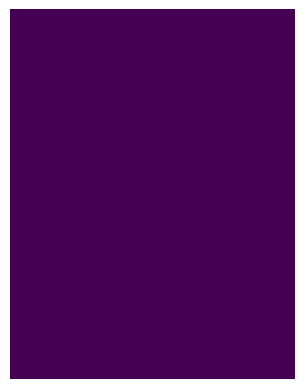

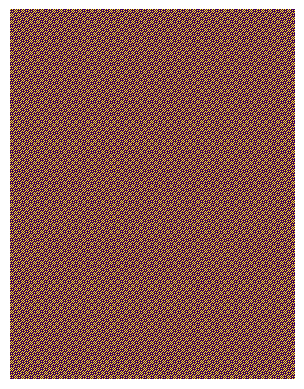

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Passo 1: Escolha da Imagem
# Supondo que você já tenha uma imagem chamada "imagem.png" no mesmo diretório do script

# Passo 2: Transformação em Matriz
def transform_to_matrix(image_path):
    image = plt.imread(image_path)
    return image

# Passo 3: Codificação de Cores
# Mapeamento de cores para números
color_codes = {
    (0, 0, 0): 0,    # Preto
    (1, 1, 1): 1,    # Branco
    (1, 1, 0): 2,    # Amarelo
    (1, 0, 0): 3,    # Vermelho
    (0, 0, 1): 4     # Azul
    # Adicione mais cores conforme necessário
}

# Passo 4: Implementação
def image_to_matrix(image, color_codes):
    matrix = np.zeros((image.shape[0], image.shape[1]), dtype=int)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            color = tuple(image[i, j])
            code = color_codes.get(color, -1)  # -1 para cores não mapeadas
            matrix[i, j] = code
    return matrix

# Função para exibir matriz como imagem
def plot_matrix(matrix):
    plt.imshow(matrix, cmap='viridis', interpolation='nearest')
    plt.axis('off')
    plt.show()

# Exemplo de uso:
imagem = transform_to_matrix("imagem.png")
matriz_pixelart = image_to_matrix(imagem, color_codes)
plot_matrix(matriz_pixelart)

# SEGUNDA PARTE

# Passo 1: Deslocamento Temporal
def deslocamento_temporal(matriz, direcao):
    matriz_temp = matriz.copy()
    if direcao == 'direita':
        matriz_temp[:, 1:] = matriz[:, :-1]
        matriz_temp[:, 0] = 0
    elif direcao == 'esquerda':
        matriz_temp[:, :-1] = matriz[:, 1:]
        matriz_temp[:, -1] = 0
    elif direcao == 'cima':
        matriz_temp[:-1, :] = matriz[1:, :]
        matriz_temp[-1, :] = 0
    elif direcao == 'baixo':
        matriz_temp[1:, :] = matriz[:-1, :]
        matriz_temp[0, :] = 0
    return matriz_temp

# Exemplo de uso:
matriz_deslocada = deslocamento_temporal(matriz_pixelart, 'direita')
plot_matrix(matriz_deslocada)

# Passo 2: Escalonamento
def escalonamento(matriz, escala):
    return np.kron(matriz, np.ones((escala, escala)))

# Exemplo de uso:
matriz_escalada = escalonamento(matriz_pixelart, 2)
plot_matrix(matriz_escalada)

# Passo 3: Reversão
def reversao(matriz, eixo):
    if eixo == 'horizontal':
        return np.flip(matriz, axis=1)
    elif eixo == 'vertical':
        return np.flip(matriz, axis=0)

# Exemplo de uso:
matriz_reversa = reversao(matriz_pixelart, 'horizontal')
plot_matrix(matriz_reversa)

# Passo 4: Sinal Periódico
def sinal_periodico(matriz, periodo):
    for i in range(matriz.shape[0]):
        for j in range(matriz.shape[1]):
            if (i + j) % periodo == 0:
                matriz[i, j] = (matriz[i, j] + 1) % len(color_codes)

# Exemplo de uso:
sinal_periodico(matriz_pixelart, 3)
plot_matrix(matriz_pixelart)


SyntaxError: invalid syntax (733103229.py, line 17)

In [195]:
import tkinter as tk
from PIL import Image, ImageTk

def aumentar_imagem(event):
    # Aumentar a imagem
    nova_largura = int(largura_original * 1.5z
    nova_altura = int(altura_original * 1.5)
    imagem_aumentada = imagem.resize((nova_largura, nova_altura))
    
    # Atualizar a imagem na tela
    imagem_label.configure(image=ImageTk.PhotoImage(imagem_aumentada))
    imagem_label.image = ImageTk.PhotoImage(imagem_aumentada)

# Criar a janela
root = tk.Tk()
root.title("Aumentar imagem ao passar o mouse")

# Carregar a imagem
imagem = Image.open("imagem4.png")
imagem = imagem.convert("RGB")
largura_original, altura_original = imagem.size

# Exibir a imagem na janela
imagem_tk = ImageTk.PhotoImage(imagem)
imagem_label = tk.Label(root, image=imagem_tk)
imagem_label.pack()

# Vincular o evento de passagem do mouse com a função de aumentar imagem
imagem_label.bind("<Enter>", aumentar_imagem)

# Executar o loop principal da janela
root.mainloop()


In [200]:
import cv2

# Carregar a imagem
imagem = cv2.imread("imagem4.png")

# Definir o fator de zoom
fator_zoom = 2

# Obter as dimensões da imagem
altura, largura = imagem.shape[:2]

# Redimensionar a imagem com o fator de zoom
nova_altura = int(altura * fator_zoom)
nova_largura = int(largura * fator_zoom)
imagem_zoom = cv2.resize(imagem, (nova_largura, nova_altura))

# Mostrar a imagem original e a imagem com zoom
cv2.imshow("Imagem Original", imagem)
cv2.imshow("Imagem com Zoom", imagem_zoom)
cv2.waitKey(0)
cv2.destroyAllWindows()


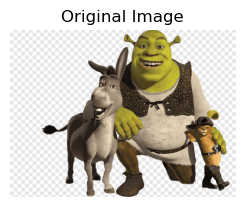

In [202]:
from PIL import Image
import numpy as np

# Carregar a imagem
imagem = Image.open("imagem4.png")
imagem = imagem.convert("RGB")

# Fator de zoom
fator_zoom = 2

# Obter dimensões da imagem
largura, altura = imagem.size

# Redimensionar a imagem com zoom
nova_largura = largura * fator_zoom
nova_altura = altura * fator_zoom
imagem_zoom = imagem.resize((int(nova_largura), int(nova_altura)))

# Converter a imagem para um array numpy
imagem_array = np.asarray(imagem_zoom)

# Mostrar a imagem com zoom
# (Código para exibir a imagem depende do ambiente de execução)
plt.subplot(1, 2, 1)
plt.imshow(imagem_array, cmap='gray')  # Assuming your image is grayscale
plt.title('Original Image')
plt.axis('off')
plt.show()

In [203]:
import cv2

# Carregar a imagem
imagem = cv2.imread("imagem4.png")

# Definir o fator de zoom
fator_zoom = 2

# Obter as dimensões da imagem
altura, largura = imagem.shape[:2]

# Redimensionar a imagem com o fator de zoom
nova_altura = int(altura * fator_zoom)
nova_largura = int(largura * fator_zoom)
imagem_zoom = cv2.resize(imagem, (nova_largura, nova_altura))

# Mostrar a imagem original e a imagem com zoom
cv2.imshow("Imagem Original", imagem)
cv2.imshow("Imagem com Zoom", imagem_zoom)
cv2.waitKey(0)
cv2.destroyAllWindows()


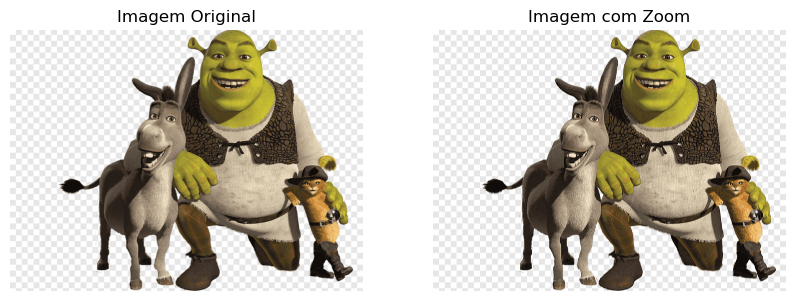

In [208]:
import cv2
import matplotlib.pyplot as plt

# Carregar a imagem
imagem = cv2.imread("imagem4.png")

# Definir o fator de zoom
fator_zoom = 10

# Obter as dimensões da imagem
altura, largura = imagem.shape[:2]

# Redimensionar a imagem com o fator de zoom
nova_altura = int(altura * fator_zoom)
nova_largura = int(largura * fator_zoom)
imagem_zoom = cv2.resize(imagem, (nova_largura, nova_altura))

# Mostrar a imagem original e a imagem com zoom usando pyplot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.title("Imagem Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imagem_zoom, cv2.COLOR_BGR2RGB))
plt.title("Imagem com Zoom")
plt.axis("off")

plt.show()


In [209]:
import numpy as np
from PIL import Image

def imagem_escala(nome_arquivo, linha, coluna, fator_escala=0.5): 
    imagem = Image.open(nome_arquivo)
    imagem = imagem.convert("RGB")
    imagem_array = np.asarray(imagem)
    
    x = linha * fator_escala 
    y = coluna * fator_escala 
    
    return x, y

# Exemplo de uso da função imagem_escala
nome_arquivo = "imagem4.png"
linha, coluna = 100, 150
fator_escala = 2  # Aumentar a imagem
nova_linha, nova_coluna = imagem_escala(nome_arquivo, linha, coluna, fator_escala)
print("Posição original:", linha, coluna)
print("Nova posição:", nova_linha, nova_coluna)


Posição original: 100 150
Nova posição: 200 300


In [210]:
from PIL import Image
import numpy as np

def atribuir_codigos_cores(imagem_array):
    codigo_cores = {
        (0, 0, 0): 0,     # Preto
        (255, 255, 255): 1,  # Branco
        (255, 255, 0): 2,    # Amarelo
        (255, 0, 0): 3,      # Vermelho
        (0, 0, 255): 4       # Azul
        # Adicione mais cores conforme necessário
    }

    codigos = np.zeros_like(imagem_array[:,:,0], dtype=int)  # Cria uma matriz de zeros para armazenar os códigos

    for i in range(imagem_array.shape[0]):
        for j in range(imagem_array.shape[1]):
            cor = tuple(imagem_array[i,j,:])  # Obtém a cor RGB do pixel
            if cor in codigo_cores:
                codigos[i,j] = codigo_cores[cor]
            else:
                # Se a cor não estiver na tabela, atribui um código genérico
                codigos[i,j] = -1

    return codigos

# Carrega a imagem e converte para um array numpy
imagem = Image.open("imagem4.png")
imagem = imagem.convert("RGB")
imagem_array = np.asarray(imagem)

# Atribui códigos numéricos para as cores presentes na imagem
codigos_cores = atribuir_codigos_cores(imagem_array)

print("Códigos numéricos para as cores presentes na imagem:")
print(codigos_cores)


Códigos numéricos para as cores presentes na imagem:
[[ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 ...
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]]
